In [2]:
import tensorflow as tf

v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))

In [3]:
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.42068508],
       [-0.62834674],
       [-0.863087  ]], dtype=float32)>


In [4]:
v.assign(tf.ones(shape=(3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [5]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [6]:
v.assign_add(tf.ones(shape=(3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [7]:
input_var = tf.Variable(initial_value=3.)

In [8]:
input_var

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [9]:
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [10]:
time = tf.Variable(0.)
time

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [11]:
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
        print(position)
    speed = inner_tape.gradient(position, time)
    print(speed)
acceleration = outer_tape.gradient(speed, time)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


In [12]:
import numpy as np

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(mean=[0, 3],
                                                 cov=[[1, 0.5], [0.5, 1]],
                                                 size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0],
                                                 cov=[[1, 0.5], [0.5, 1]],
                                                 size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))


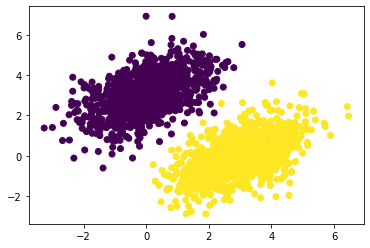

In [13]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [15]:
x = tf.Variable(tf.random.uniform((2, 2)))

with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_y_res_to_x = tape.gradient(y, x)

In [16]:
grad_y_res_to_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [19]:
num_samples_per_class = 1000

positive_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]],
                                                 size=num_samples_per_class)
negative_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]],
                                                 size=num_samples_per_class)


In [20]:
positive_samples

array([[-0.12840926,  4.02546968],
       [-0.2345251 ,  1.88623289],
       [-0.39920751,  2.53808371],
       ...,
       [-0.11644556,  3.60735615],
       [-1.36538249,  2.47064193],
       [ 0.83942168,  3.11118466]])

In [21]:
inputs = np.vstack((positive_samples, negative_samples)).astype(np.float32)

In [22]:
inputs

array([[-0.12840927,  4.02547   ],
       [-0.2345251 ,  1.8862329 ],
       [-0.3992075 ,  2.5380838 ],
       ...,
       [ 4.3490157 , -0.2740784 ],
       [ 4.1984305 ,  0.5119663 ],
       [ 2.7114956 , -0.38314557]], dtype=float32)

In [23]:
targets = np.vstack((np.zeros(shape=(num_samples_per_class, 1), dtype='float32'), np.ones(
    shape=(num_samples_per_class, 1), dtype='float32'
)))

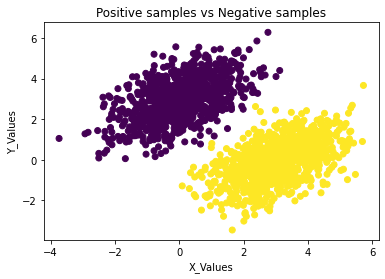

In [26]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.title('Positive samples vs Negative samples')
plt.savefig('Linear classification')
plt.xlabel('X_Values')
plt.ylabel('Y_Values')
plt.show()

In [30]:
inp_dim = 2
out_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(inp_dim, out_dim)))
b = tf.Variable(initial_value=tf.random.uniform(shape=(out_dim,)))

def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(predictions, targets):
    per_sample_losses = tf.square(predictions - targets)
    return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    gradient_loss_wrt_W, gradient_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(gradient_loss_wrt_W * learning_rate)
    b.assign_sub(gradient_loss_wrt_b * learning_rate)
    return loss

#Conduct batch training instead of mini-batch training. Gradient update will be fast and
#effective

for step in range(40):
    loss = training_step(inputs, targets)
    print(f'Loss at step {step}: {loss:.4f}')


Loss at step 0: 1.0576
Loss at step 1: 0.0793
Loss at step 2: 0.0657
Loss at step 3: 0.0611
Loss at step 4: 0.0577
Loss at step 5: 0.0548
Loss at step 6: 0.0521
Loss at step 7: 0.0497
Loss at step 8: 0.0475
Loss at step 9: 0.0454
Loss at step 10: 0.0436
Loss at step 11: 0.0419
Loss at step 12: 0.0404
Loss at step 13: 0.0389
Loss at step 14: 0.0377
Loss at step 15: 0.0365
Loss at step 16: 0.0354
Loss at step 17: 0.0345
Loss at step 18: 0.0336
Loss at step 19: 0.0328
Loss at step 20: 0.0320
Loss at step 21: 0.0314
Loss at step 22: 0.0307
Loss at step 23: 0.0302
Loss at step 24: 0.0297
Loss at step 25: 0.0292
Loss at step 26: 0.0288
Loss at step 27: 0.0284
Loss at step 28: 0.0280
Loss at step 29: 0.0277
Loss at step 30: 0.0274
Loss at step 31: 0.0272
Loss at step 32: 0.0269
Loss at step 33: 0.0267
Loss at step 34: 0.0265
Loss at step 35: 0.0263
Loss at step 36: 0.0261
Loss at step 37: 0.0260
Loss at step 38: 0.0258
Loss at step 39: 0.0257


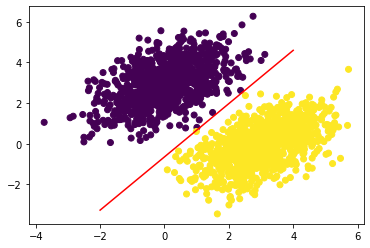

In [45]:
predictions = model(inputs)
x = np.linspace(-2, 4, 100)
y = -(W[0]/W[1])*x + ((0.5 - b)/W[1])
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.savefig('Linear classification_2')
plt.show()